<a href="https://colab.research.google.com/github/prashantsinghaniya/Java-Big-Integer/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso

import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")
print (path)
dataset = pd.read_csv(path + "/CAR DETAILS FROM CAR DEKHO.csv")



/kaggle/input/vehicle-dataset-from-cardekho


In [98]:
dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [46]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [39]:
dataset.shape

(4340, 8)

In [50]:
print(dataset["fuel"].value_counts())
print(dataset["seller_type"].value_counts())
print(dataset["transmission"].value_counts())
print(dataset["owner"].value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [79]:
dataset.replace({"fuel":{"Petrol":0, "Diesel":1, "CNG":2, "LPG":3, "Electric":4}},inplace=True)
dataset.replace({"seller_type":{"Individual":0, "Dealer":1, "Trustmark Dealer":2}},inplace=True)
dataset.replace({"transmission": {"Manual":0, "Automatic":1}}, inplace=True)
dataset.replace({"owner": {"First Owner":0, "Second Owner":1, "Third Owner":2, "Fourth & Above Owner":3, "Test Drive Car":4}},inplace=True)

<ipython-input-79-ba9920e6d72e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({"owner": {"First Owner":0, "Second Owner":1, "Third Owner":2, "Fourth & Above Owner":3, "Test Drive Car":4}},inplace=True)


In [80]:
dataset.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1
5,Maruti Alto LX BSIII,2007,140000,125000,0,0,0,0
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,0,0,0,0
7,Tata Indigo Grand Petrol,2014,240000,60000,0,0,0,1
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,0,0,0,0
9,Maruti Celerio Green VXI,2017,365000,78000,2,0,0,0


In [40]:
# le = LabelEncoder()
# columns_to_encoding = ["fuel",	"seller_type", "transmission", "owner"]
# dataset[columns_to_encoding] = dataset[columns_to_encoding].apply(le.fit_transform)


<Axes: >

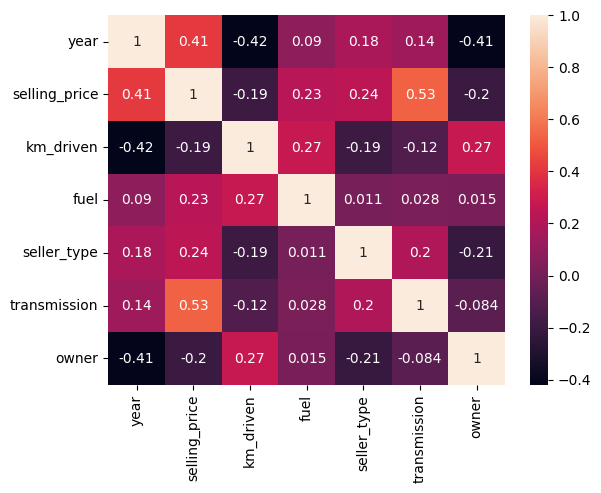

In [81]:
sns.heatmap(dataset.drop(columns=["name"]).corr(),annot=True)

In [83]:
X = dataset.drop(columns=["selling_price","name"], axis=1)
y = dataset["selling_price"]

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000
...,...
4335,409999
4336,409999
4337,110000
4338,865000


In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [119]:
model = XGBRegressor()
model.fit(x_train, y_train)
y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)


In [126]:
mse_xgb_train = mean_squared_error(y_train, y_predict_train)
mse_xgb_test = mean_squared_error(y_test, y_predict_test)
print(mse_xgb_train, mse_xgb_test)

mae_xgb_train = mean_absolute_error(y_train, y_predict_train)
mae_xgb_test = mean_absolute_error(y_test, y_predict_test)
print(mae_xgb_train, mae_xgb_test)

r2_score_xgb_train = r2_score(y_train, y_predict_train)
r2_score_xgb_test = r2_score(y_test, y_predict_test)
print(r2_score_xgb_train, r2_score_xgb_test)



22741135360.0 108960382976.0
95812.25 166727.96875
0.9300864934921265 0.7065839767456055


In [106]:
dataset["selling_price"].mean()

np.float64(504127.3117511521)

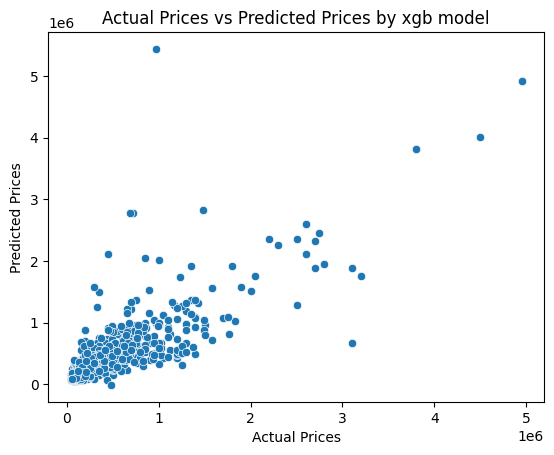

In [125]:
sns.scatterplot(x=y_test, y=y_predict_test)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices by xgb model")
plt.show()

linear Regression model


In [127]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred_train = lin_model.predict(x_train)
y_pred_test = lin_model.predict(x_test)

In [128]:
mse_linear_train = mean_squared_error(y_train, y_pred_train)
mse_linear_test = mean_squared_error(y_test, y_pred_test)
print(mse_linear_train, mse_linear_test)
mae_linear_train = mean_absolute_error(y_train, y_pred_train)
mae_linear_test = mean_absolute_error(y_test, y_pred_test)
print(mae_linear_train, mae_linear_test)
r2_score_linear_train = r2_score(y_train, y_pred_train)
r2_score_linear_test = r2_score(y_test, y_pred_test)
print(r2_score_linear_train, r2_score_linear_test)

186569290566.98846 190108230501.6191
227306.12008293497 242640.26144744147
0.4264262982542847 0.4880635121076171


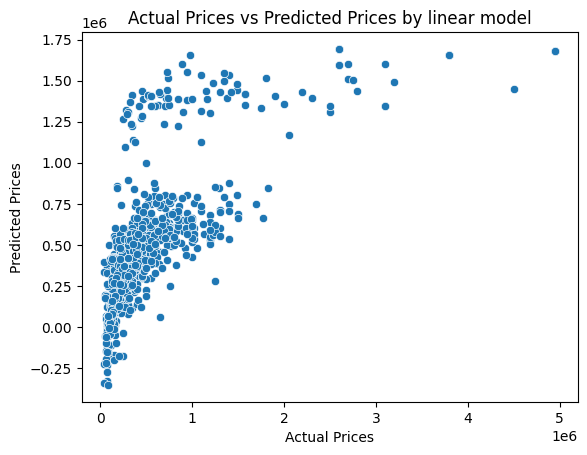

In [129]:
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices by linear model")
plt.show()

lasso model


In [130]:
lasso_mod = Lasso()
lasso_mod.fit(x_train, y_train)
y_pred_train_lasso = lasso_mod.predict(x_train)
y_pred_test_lasso = lasso_mod.predict(x_test)

In [131]:
mse_lasso_train = mean_squared_error(y_train, y_pred_train)
mse_lasso_test = mean_squared_error(y_test, y_pred_test)
print(mse_lasso_train, mse_lasso_test)
mae_lasso_train = mean_absolute_error(y_train, y_pred_train)
mae_lasso_test = mean_absolute_error(y_test, y_pred_test)
print(mae_lasso_train, mae_lasso_test)
r2_score_lasso_train = r2_score(y_train, y_pred_train)
r2_score_lasso_test = r2_score(y_test, y_pred_test)
print(r2_score_lasso_train, r2_score_lasso_test)

186569290566.98846 190108230501.6191
227306.12008293497 242640.26144744147
0.4264262982542847 0.4880635121076171


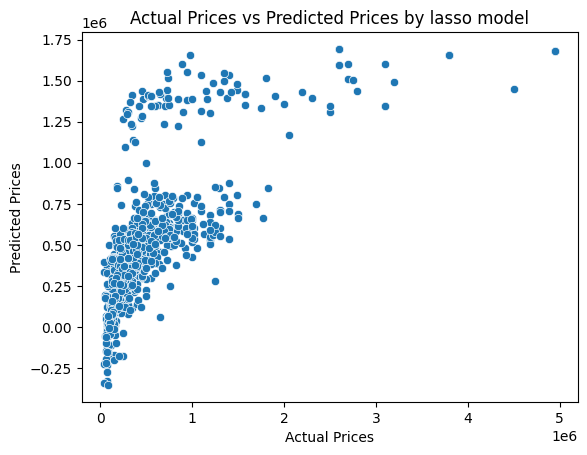

In [132]:
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices by lasso model")
plt.show()